## **The most Potential Skills to Learn for Data Analysts in United States**

### **Purpose**
- Identifying the likelihood percentage of data analyst skills to appear on data analysts jobs requirements in United States
- Identifying the median salary of data analyst skills in United States

### **Method**
- Import libraries and load the dataset
- Clean and filter the dataset
- Aggregate the total counts of eachskills
- Aggregate the median salary of each skills
- Aggregate the percentage of the likelihood of each skills
- Plot the result

### **1. Import Libraries and Load Dataset**

In [14]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\harto\OneDrive\Dokumen\DATA ANALYST PORTOFOLIO PROJECT\5. Data Jobs Analyis Using Python\dataset\data_jobs.csv')
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


### **2. Clean and Filter The Dataset**

In [ ]:
# Change data type to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
# Change data type to list
def str_to_list (column) :
    if pd.notna(column) :
        return ast.literal_eval(column)

df['job_skills'] = df['job_skills'].apply(str_to_list)

In [ ]:
# Filter the location only for United States, and job title only for data analyst
df_filtered = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')][['job_title_short', 'salary_year_avg', 'job_skills']]

# Drop the job that didn't have any salary information
df_filtered = df_filtered.dropna(subset = 'salary_year_avg')
df_filtered

,job_title_short,salary_year_avg,job_skills
109,Data Analyst,89000.0,"[python, r, alteryx, tableau]"
180,Data Analyst,90250.0,"[excel, powerpoint]"
410,Data Analyst,133285.0,"[sql, word, excel, visio, powerpoint, sharepoint]"
988,Data Analyst,62623.0,"[sql, excel, tableau]"
1413,Data Analyst,71300.0,"[sql, excel, power bi]"
...,...,...,...
782637,Data Analyst,70000.0,"[vba, sql, sql server]"
782798,Data Analyst,111175.0,[terminal]
783588,Data Analyst,125000.0,"[sql, r, python, hadoop, excel]"
783866,Data Analyst,115000.0,[unix]


### **3. Aggregate The Median Salary and The Likelihood Percentage of Each Skills**

In [ ]:
# Retrieve the number of job remained after filtered
da_total = df_filtered['job_title_short'].size 
da_total

4350

In [ ]:
# Explode the job skills
df_explode = df_filtered.explode('job_skills') 
df_explode

,job_title_short,salary_year_avg,job_skills
109,Data Analyst,89000.0,python
109,Data Analyst,89000.0,r
109,Data Analyst,89000.0,alteryx
109,Data Analyst,89000.0,tableau
180,Data Analyst,90250.0,excel
...,...,...,...
784882,Data Analyst,87500.0,sql
784882,Data Analyst,87500.0,vba
784882,Data Analyst,87500.0,tableau
784882,Data Analyst,87500.0,excel


In [ ]:
# Aggregate the count of skills and median salary of skills
df_agg = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

# Aggregate the percentage of skills
df_agg['percentage'] = df_agg['count']/da_total * 100

# Filter only for skills that have percentage more than 5%
df_agg = df_agg[df_agg['percentage'] > 5]
df_agg

,count,median,percentage
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### **4. Plot The Result**

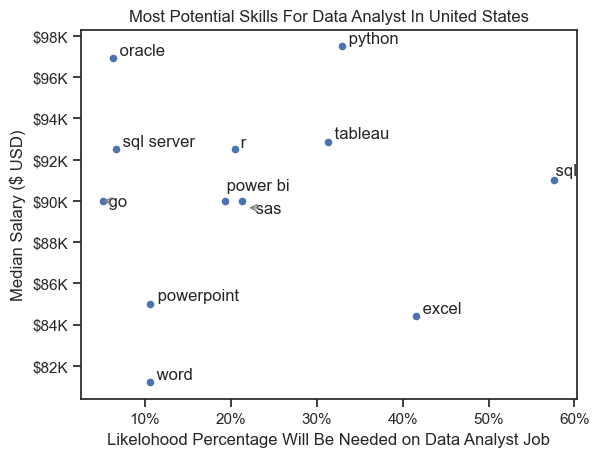

In [28]:
from adjustText import adjust_text

sns.set_theme(style='ticks')

# Scatter plot
df_agg.plot(kind='scatter', y='median', x='percentage')
plt.xlabel('Likelohood Percentage Will Be Needed on Data Analyst Job')
plt.ylabel('Median Salary ($ USD)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.title('Most Potential Skills For Data Analyst In United States')

# Add labels (with small nudges for overlapping ones)
texts = []
for i, txt in enumerate(df_agg.index):
    x = df_agg['percentage'].iloc[i]
    y = df_agg['median'].iloc[i]
    
    if txt.lower() == "power bi":
        y += 300   # nudge upwards
    elif txt.lower() == "sas":
        y -= 300   # nudge downwards

    texts.append(plt.text(x, y, " " + txt))

# Adjust text with arrows
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color="gray", shrinkA=5, shrinkB=5),
    expand_points=(1.3, 1.6),
    expand_text=(1.3, 1.6),
    force_points=0.5,
    force_text=0.5,
    lim=2000
)

plt.show()